In [15]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.23959251 0.25084585 0.00473283 ... 0.00689575 0.25249409 0.11960752]
 [0.23378156 0.24476196 0.00461804 ... 0.00672851 0.24637023 0.11670662]
 [0.07106711 0.07440504 0.00140384 ... 0.0020454  0.07489393 0.03547757]
 ...
 [0.31487287 0.32966202 0.00621989 ... 0.00906241 0.33182814 0.15718839]
 [0.2784692  0.29154852 0.00550079 ... 0.00801467 0.29346421 0.13901524]
 [0.19202095 0.20103991 0.00379312 ... 0.00552659 0.20236089 0.09585921]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.15729626  0.25514669  0.00223823 ...  0.04611512  0.18327853
   0.32132539]
 [ 0.22645217  0.3308526  -0.15027303 ...  0.12331743  0.35275851
   0.00703648]
 [ 0.01835448  0.13669114  0.04526201 ... -0.050317   -0.00199891
   0.0625309 ]
 ...
 [ 0.5266842   0.48209953  0.1087332  ... -0.05753982  0.38705523
   0.10789001]
 [ 0.30106591  0.39572074  0.03407535 ... -0.05744497  0.31098397
   0.21673516]
 [ 0.23631413  0.23899202  0.12288728 ... -0.02066048  0.17201001
   0.03

In [16]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [17]:
mycebmf= cEBMF(data= noisy_matrix, prior_L= prior_point_exp ,
               prior_F= prior_point_exp )
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [18]:
K = np.min([K, U.shape[1]])
print(K)

5


In [19]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[ 0.27410725 -0.08441103 -0.01901503 -0.10751686 -0.26978052 -0.15960737
  0.20739406  0.00699902 -0.03081187 -0.27041972  0.10257101  0.03131589
  0.22211176  0.13320048 -0.05870811 -0.15365551 -0.26079056 -0.03180201
  0.21514003 -0.20816186  0.00325889  0.11307917  0.14640859  0.0414364
 -0.05188331  0.1711391   0.12879369 -0.31609595  0.08331279  0.24035595
  0.07284867 -0.05268333  0.0616893   0.0399907  -0.12835294 -0.09896785
  0.42801994 -0.01178439 -0.39966762  0.01743185  0.11012548  0.0435666
  0.19256465 -0.36939028 -0.06702801 -0.21078153 -0.30951852  0.08026759
 -0.21037047  0.17251398]
[ 0.1805759  -0.12411718  0.09798776 -0.05778924 -0.14370744  0.1072854
 -0.00398919 -0.06167181  0.2294743   0.26094162  0.06290238  0.26670948
 -0.06606229  0.02471585  0.12585746 -0.35159114 -0.1829309  -0.09408129
 -0.18744802 -0.33942312  0.10096981  0.15226598  0.07230905  0.08946605
  0.1202815   0.1507774   0.19392638 -0.12589857  0.01100403  0.05473741
  0.01864909  0.11467136 -0.

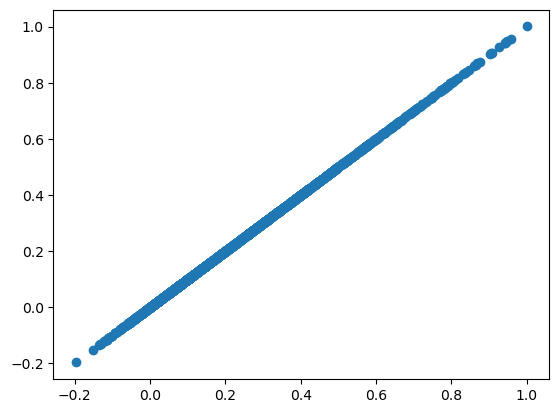

In [20]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

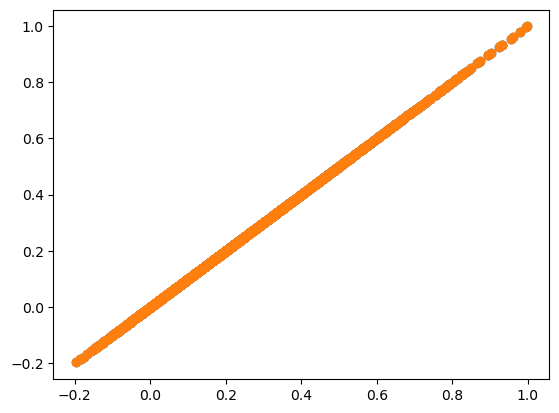

In [21]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [22]:
mycebmf.update_tau()
mycebmf.tau

array([[151.19972, 151.19972, 151.19972, ..., 151.19972, 151.19972,
        151.19972],
       [151.19972, 151.19972, 151.19972, ..., 151.19972, 151.19972,
        151.19972],
       [151.19972, 151.19972, 151.19972, ..., 151.19972, 151.19972,
        151.19972],
       ...,
       [151.19972, 151.19972, 151.19972, ..., 151.19972, 151.19972,
        151.19972],
       [151.19972, 151.19972, 151.19972, ..., 151.19972, 151.19972,
        151.19972],
       [151.19972, 151.19972, 151.19972, ..., 151.19972, 151.19972,
        151.19972]], dtype=float32)

In [23]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

<function prior_point_exp at 0x00000224839C3130>


ValueError: Optimization failed: ABNORMAL: 

In [ ]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([0.0334454 , 0.48840472, 0.5005419 , 1.0743995 , 0.9094748 ,
        0.7732798 , 0.0701019 , 0.77459854, 0.18811402, 0.91700894,
        1.2736101 , 0.55852646, 1.3610915 , 1.4226887 , 1.2480628 ,
        0.9539855 , 1.1695296 , 1.115641  , 0.64176905, 0.17860538,
        0.43989554, 1.2228546 , 0.8055102 , 0.9483999 , 1.3019323 ,
        1.365019  , 0.85394675, 0.31769758, 0.4133198 , 1.2100754 ,
        0.32255852, 0.20799991, 1.1697574 , 0.17367207, 1.0523629 ,
        0.47803393, 1.2670833 , 0.04192479, 0.6559543 , 0.829721  ],
       dtype=float32),
 array([0.02852375, 0.02852375, 0.02852375, 0.02852375, 0.02852375,
        0.02852375, 0.02852375, 0.02852375, 0.02852375, 0.02852375,
        0.02852375, 0.02852375, 0.02852375, 0.02852375, 0.02852375,
        0.02852375, 0.02852375, 0.02852375, 0.02852375, 0.02852375,
        0.02852375, 0.02852375, 0.02852375, 0.02852375, 0.02852375,
        0.02852375, 0.02852375, 0.02852375, 0.02852375, 0.02852375,
        0.02852375, 0.02

In [ ]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_exp.py:169: RuntimeWarning: overflow encountered in exp
  dlogpnorm_right = np.exp(-0.5 * np.log(2 * np.pi) - 0.5 * xright**2 - lpnormright)


ValueError: Optimization failed: ABNORMAL: 

In [ ]:
np.sqrt(np.mean((np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ) - rank_1_matrix) ** 2))

0.02268796419068545

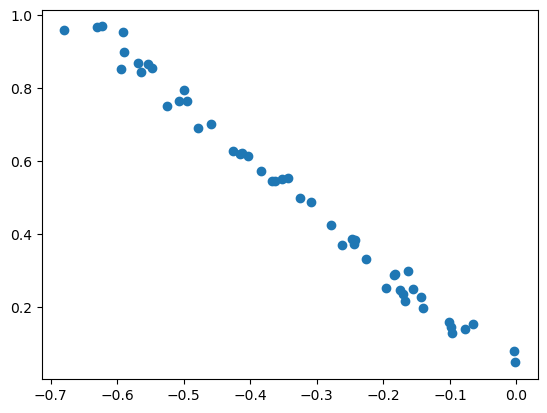

In [ ]:
plt.scatter(mycebmf.L[:,0], u)

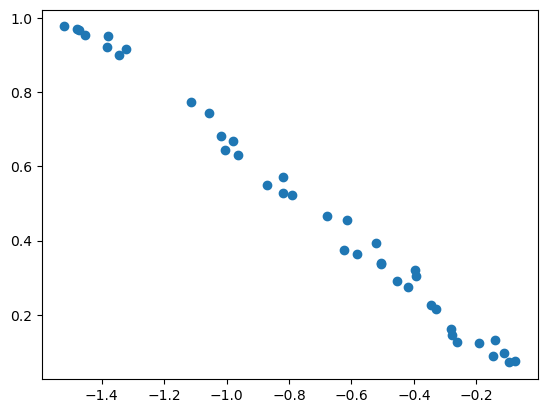

In [ ]:
plt.scatter(mycebmf.F[:,0], v)

In [ ]:
mycebmf.L[:,1]

array([ 2.2017754e-09,  7.3078615e-10,  8.2540069e-10, -1.4746626e-09,
       -3.8525874e-10, -1.1600354e-09,  1.6385789e-09, -1.1235084e-09,
       -9.1349567e-10,  7.5147305e-10, -1.4246283e-09, -4.2266093e-10,
       -2.9553093e-09,  3.0634943e-09,  7.7385619e-11, -5.4204502e-10,
       -3.4385828e-09,  1.4146830e-09,  2.5857787e-09, -4.6744608e-09,
        2.3846982e-09,  3.0326372e-10,  2.0592215e-10,  3.3710426e-10,
        8.5866808e-10,  2.9489995e-09,  1.9497390e-09, -1.9603401e-09,
        1.1548745e-09,  1.5635350e-09, -4.2182138e-09, -3.5933401e-09,
       -4.6787814e-09, -2.1801028e-09, -1.3135959e-09,  1.1719823e-09,
        3.3400873e-09,  8.0408608e-10, -1.5708038e-09,  5.6013449e-10,
       -1.4595566e-09,  4.8458402e-09, -1.7272612e-09, -2.9436402e-09,
        3.6920129e-09, -2.2151409e-11,  2.9686348e-10,  2.6174301e-09,
       -5.1803362e-09,  1.5322859e-09], dtype=float32)

In [ ]:
for i in range(200):
    mycebmf.iter()

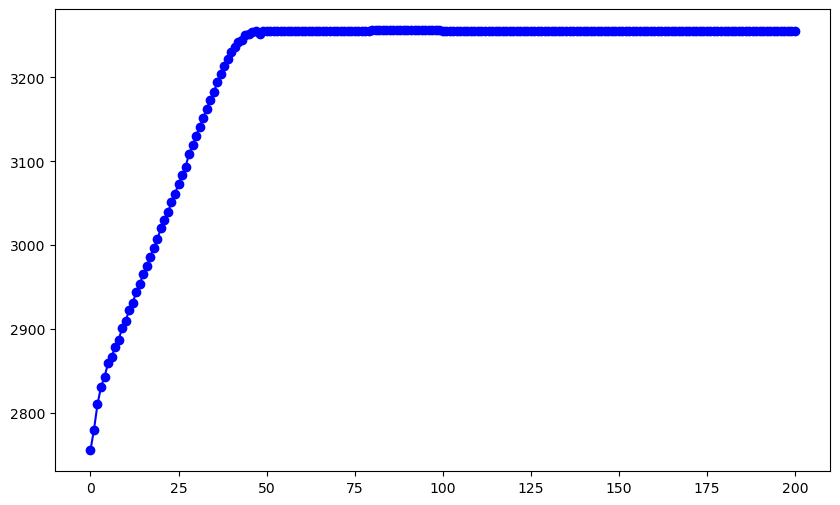

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

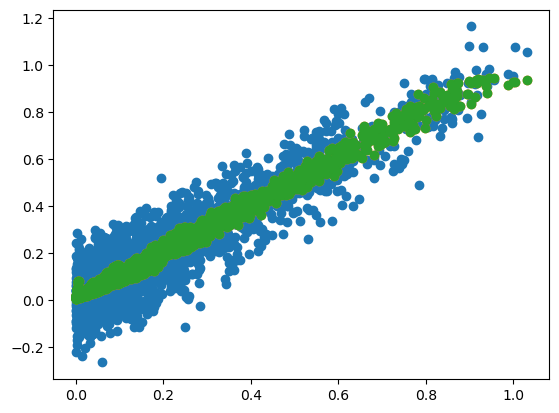

In [ ]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [ ]:
mycebmf.L
 

array([[-0.14146803,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.24046873,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.5824966 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.5801475 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.4191752 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.303166  ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.35743603,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.40878963,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.32034147,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.51696306,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.2435664 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.62020135,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.13794336,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.4511093 ,  0.        ,  0. 

In [ ]:
np.sqrt(np.mean((np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ) - rank_1_matrix) ** 2))

0.02290884031146492

In [ ]:
# ebnm_point_exponential.py
# Point–Exponential Empirical Bayes for Normal means:
# Prior: (1 - w) * δ_{mu}  +  w * Exp(rate=a) on theta >= 0
# Likelihood: X | theta ~ N(theta, s^2)
# Parameters optimized on unconstrained scales: alpha (w = sigmoid(alpha)),
#                                              beta  (a = exp(beta)),
#                                              mu    (free).

from __future__ import annotations
import numpy as np
from dataclasses import dataclass
from typing import Tuple, Optional
from scipy.stats import norm
from scipy.optimize import minimize

# =========================
# Numeric helpers
# =========================

_LOG2PI = np.log(2.0 * np.pi)

def _log_phi(z: np.ndarray) -> np.ndarray:
    return -0.5 * z**2 - 0.5 * _LOG2PI

def _phi(z: np.ndarray) -> np.ndarray:
    return np.exp(_log_phi(z))

def _log_Phi(z: np.ndarray) -> np.ndarray:
    # stable log CDF
    return norm.logcdf(z)

def _logaddexp(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    # stable log(exp(x) + exp(y))
    return np.logaddexp(x, y)

def _logdiffexp(logB: np.ndarray, logA: np.ndarray) -> np.ndarray:
    # log(exp(logB) - exp(logA)), assuming logB >= logA
    return logB + np.log1p(-np.exp(logA - logB))

# =========================
# Truncated normal moments
# X ~ N(m, s^2), a < X < b
# =========================

def _etruncnorm(a: np.ndarray, b: np.ndarray, m: np.ndarray, s: np.ndarray) -> np.ndarray:
    """
    E[X | a < X < b], robust to extreme tails.
    a,b,m,s broadcast; a or b can be +/- np.inf.
    """
    s = np.maximum(s, np.finfo(float).tiny)
    alpha = (a - m) / s
    beta  = (b - m) / s

    swap = beta < alpha
    alpha2 = np.where(swap, beta, alpha)
    beta2  = np.where(swap, alpha, beta)

    logPhiA = _log_Phi(alpha2)
    logPhiB = _log_Phi(beta2)
    logZ    = _logdiffexp(logPhiB, logPhiA)
    Z       = np.maximum(np.exp(logZ), np.finfo(float).tiny)

    num = _phi(alpha2) - _phi(beta2)
    t = num / Z
    # limit 0 when both num and Z ~ 0
    t = np.where((np.abs(num) <= np.finfo(float).tiny) & (Z <= np.finfo(float).tiny), 0.0, t)
    return m + s * t

def _e2truncnorm(a: np.ndarray, b: np.ndarray, m: np.ndarray, s: np.ndarray) -> np.ndarray:
    """
    E[X^2 | a < X < b], X ~ N(m, s^2), robust for infinite bounds.
    """
    s = np.maximum(s, np.finfo(float).tiny)

    alpha = (a - m) / s
    beta  = (b - m) / s

    swap = beta < alpha
    alpha2 = np.where(swap, beta, alpha)
    beta2  = np.where(swap, alpha, beta)

    logPhiA = norm.logcdf(alpha2)
    logPhiB = norm.logcdf(beta2)
    # logZ = log(Phi(beta) - Phi(alpha)) (stable)
    logZ = logPhiB + np.log1p(-np.exp(logPhiA - logPhiB))
    Z = np.maximum(np.exp(logZ), np.finfo(float).tiny)

    # standard normal pdfs
    phi_a = np.exp(-0.5 * alpha2**2 - 0.5 * np.log(2*np.pi))
    phi_b = np.exp(-0.5 * beta2**2  - 0.5 * np.log(2*np.pi))

    # SAFE products: treat inf*0 -> 0 by masking infs before multiply
    alpha_safe = np.where(np.isfinite(alpha2), alpha2, 0.0)
    beta_safe  = np.where(np.isfinite(beta2),  beta2,  0.0)
    term1 = alpha_safe * phi_a - beta_safe * phi_b

    # (phi_a - phi_b)/Z with 0/0 -> 0
    num_phi = phi_a - phi_b
    term2 = num_phi / Z
    tiny = np.finfo(float).tiny
    term2 = np.where((np.abs(num_phi) <= tiny) & (Z <= tiny), 0.0, term2)

    var  = s**2 * (1.0 + term1 / Z - term2**2)

    # mean uses the same robust machinery
    mean = _etruncnorm(a, b, m, s)
    return var + mean**2


# =========================
# Convolution: Exp(a) * N(0, s^2)
# For theta >= 0 with Exp(rate=a)
# =========================

def _log_g_exp(x_minus_mu: np.ndarray, s: np.ndarray, a: float) -> np.ndarray:
    """
    log g(x) where g = Exp(rate=a) on theta>=0 convolved with N(0, s^2),
    evaluated at x - mu.
    Formula: log a + 0.5 s^2 a^2 - a (x - mu) + logPhi( (x-mu)/s - s a )
    """
    z = x_minus_mu / s - s * a
    return np.log(a) + 0.5 * (s**2) * (a**2) - a * x_minus_mu + _log_Phi(z)

# =========================
# Posterior responsibility for the non-zero component
# =========================

def wpost_pe(x: np.ndarray, s: np.ndarray, w: float, a: float, mu: float = 0.0) -> np.ndarray:
    """
    Posterior probability of the Exp component:
      wpost = w * g(x) / ((1-w)*f(x) + w*g(x))
    where f is N(mu, s^2), g is the exp-normal convolution.
    Computed in log-space for stability.
    """
    if w == 0.0:
        return np.zeros_like(x, dtype=float)
    if w == 1.0:
        return np.ones_like(x, dtype=float)

    xm = x - mu
    lf = norm.logpdf(x, loc=mu, scale=s)             # log f
    lg = _log_g_exp(xm, s, a)                        # log g

    log_num = np.log(w)     + lg
    log_den = _logaddexp(np.log(1.0 - w) + lf, log_num)
    return np.exp(log_num - log_den)

# =========================
# Posterior moments
# =========================

@dataclass
class PosteriorMeanPointExp:
    post_mean: np.ndarray
    post_mean2: np.ndarray
    post_sd: np.ndarray

def posterior_mean_pe(x: np.ndarray, s: np.ndarray, w: float, a: float, mu: float = 0.0) -> PosteriorMeanPointExp:
    """
    Compute posterior mean, second moment, and sd of Theta_total = theta + mu
    under prior (1-w) δ_mu + w * Exp(rate=a) with support theta>=0.
    """
    x = np.asarray(x, dtype=float)
    s = np.asarray(s, dtype=float)

    wpost = wpost_pe(x, s, w, a, mu)

    # For the non-zero component: theta|x ~ N(m_pos, s^2) truncated to (0, +inf)
    m_pos = (x - mu) - (s**2) * a
    e1 = _etruncnorm(0.0, np.inf, m_pos, s)     # E[theta | nonzero, x]
    e2 = _e2truncnorm(0.0, np.inf, m_pos, s)    # E[theta^2 | nonzero, x]

    E_theta  = wpost * e1
    E_theta2 = wpost * e2

    # s = inf: fallback to prior moments of Exp(rate=a)
    inf_mask = np.isinf(s)
    if inf_mask.any():
        E_theta[inf_mask]  = wpost[inf_mask] * (1.0 / a)
        E_theta2[inf_mask] = wpost[inf_mask] * (2.0 / (a**2))

    # Ensure second moment >= square of mean (numerically)
    E_theta2 = np.maximum(E_theta2, E_theta**2)
    post_sd  = np.sqrt(np.maximum(0.0, E_theta2 - E_theta**2))

    # Shift back by mu:
    post_mean  = E_theta  + mu
    post_mean2 = E_theta2 + 2.0 * mu * E_theta + mu**2

    return PosteriorMeanPointExp(post_mean=post_mean, post_mean2=post_mean2, post_sd=post_sd)

# =========================
# Negative log-likelihood + gradients
# =========================

def pe_nllik(params_free: np.ndarray, x: np.ndarray, s: np.ndarray,
             fix_par: Tuple[bool, bool, bool] = (False, False, False),
             par_init_full: Optional[np.ndarray] = None,
             calc_grad: bool = True):
    """
    NLL under point-exponential model, optionally with analytic gradients.
    params_free are the *free* parameters corresponding to (~fix_par):
      full p = [alpha, beta, mu]; w = sigmoid(alpha), a = exp(beta).
    """
    # Build full parameter vector p from free + fixed
    if par_init_full is None:
        p_full = np.zeros(3, dtype=float)
    else:
        p_full = np.array(par_init_full, dtype=float)
    p_full[~np.array(fix_par, dtype=bool)] = np.asarray(params_free, dtype=float)

    alpha, beta, mu = p_full
    w = 1.0 / (1.0 + np.exp(-alpha))          # sigmoid
    a = np.exp(beta)

    x = np.asarray(x, dtype=float)
    s = np.asarray(s, dtype=float)

    # log-likelihood per-point
    lf = norm.logpdf(x, loc=mu, scale=s)
    lg = _log_g_exp(x - mu, s, a)
    llik = _logaddexp(np.log(1.0 - w) + lf, np.log(w) + lg)
    nll = -np.sum(llik)

    if not calc_grad:
        return nll

    # responsibilities (posterior over components given current params)
    # r_f + r_g = 1
    r_f = np.exp(lf - llik)    # responsibility of point-mass component
    r_g = np.exp(lg - llik)    # responsibility of exponential component

    # d nll / d alpha (via w):  d nll / d w = sum(f - g); dw/dalpha = w(1-w)
    grad_full = np.zeros_like(p_full)
    if not fix_par[0]:
        dw_dalpha = w * (1.0 - w)
        d_nll_dw  = np.sum(r_f - r_g)
        grad_full[0] = d_nll_dw * dw_dalpha

    # Helpful quantities for derivatives wrt a and mu
    z = (x - mu) / s - s * a
    # ratio phi(z)/Phi(z) computed stably in log-space; clip to avoid overflow
    log_ratio = _log_phi(z) - _log_Phi(z)
    ratio = np.exp(np.clip(log_ratio, a_min=-745, a_max=+745))  # ~exp bounds for float64

    # d lg / d a = 1/a + s^2 a - (x - mu) - s * ratio
    d_lg_da = (1.0 / a) + (s**2) * a - (x - mu) - s * ratio
    # d lg / d mu = a - (1/s) * ratio
    d_lg_dmu = a - ratio / s
    # d lf / d mu = (x - mu) / s^2
    d_lf_dmu = (x - mu) / (s**2)

    if not fix_par[1]:
        # d nll / d a = - sum r_g * d lg / d a   ;  da/dbeta = a
        d_nll_da = -np.sum(r_g * d_lg_da)
        grad_full[1] = d_nll_da * a

    if not fix_par[2]:
        # d nll / d mu = - sum [ (1-w) responsibility * d lf/dmu + w responsibility * d lg/dmu ]
        d_nll_dmu = -np.sum((1.0 - w) * (r_f * d_lf_dmu) + w * (r_g * d_lg_dmu))
        # Equivalent: -sum[ r_f * d lf/dmu + r_g * d lg/dmu ]
        # (since r_f,r_g already include mixing through llik), but both are fine.
        grad_full[2] = d_nll_dmu

    # return only free gradients
    return nll, grad_full[~np.array(fix_par, dtype=bool)]

# =========================
# Optimizer wrapper
# =========================

@dataclass
class OptimizePointExponential:
    w: float
    a: float
    mu: float
    nllik: float

def optimize_pe_nllik_with_gradient(x: np.ndarray, s: np.ndarray,
                                    par_init: Tuple[float, float, float],
                                    fix_par: Tuple[bool, bool, bool]) -> OptimizePointExponential:
    """
    Optimize (alpha,beta,mu) on unconstrained scales using L-BFGS-B with analytic gradients.
    par_init are the full parameters [alpha, beta, mu], regardless of fix_par.
    """
    x = np.asarray(x, dtype=float)
    s = np.asarray(s, dtype=float)

    # Extract free subset
    p0 = np.asarray(par_init, dtype=float)[~np.array(fix_par, dtype=bool)]

    def fun(pfree):
        nll, _ = pe_nllik(pfree, x, s, fix_par=fix_par, par_init_full=np.asarray(par_init, dtype=float), calc_grad=True)
        return nll

    def jac(pfree):
        _, g = pe_nllik(pfree, x, s, fix_par=fix_par, par_init_full=np.asarray(par_init, dtype=float), calc_grad=True)
        return g

    # Reasonable bounds only for beta if you like; alpha, mu unbounded.
    bounds = []
    k = 0
    for fixed in fix_par:
        if not fixed:
            if k == 1:
                bounds.append((None, None))  # beta unrestricted; exp(beta) > 0 anyway
            else:
                bounds.append((None, None))
        k += 1

    res = minimize(fun, p0, method="L-BFGS-B", jac=jac, bounds=bounds)

    # Reconstruct full parameters
    p_full = np.array(par_init, dtype=float)
    p_full[~np.array(fix_par, dtype=bool)] = res.x
    alpha, beta, mu = p_full
    w = 1.0 / (1.0 + np.exp(-alpha))
    a = float(np.exp(beta))
    return OptimizePointExponential(w=float(w), a=a, mu=float(mu), nllik=float(res.fun))

# =========================
# One-shot solver
# =========================

@dataclass
class EBNMPointExpResult:
    post_mean: np.ndarray
    post_mean2: np.ndarray
    post_sd: np.ndarray
    scale: float
    pi: float
    log_lik: float
    mode: float

def ebnm_point_exp_solver(x: np.ndarray, s: np.ndarray,
                          opt_mu: bool = False,
                          par_init: Tuple[float, float, float] = (0.0, 0.0, 0.0)) -> EBNMPointExpResult:
    """
    Fit point–exponential EBNM and return posterior summaries.
    par_init are [alpha, beta, mu] (unconstrained scales).
    If opt_mu=False, mu is fixed at par_init[2].
    """
    fix_par = (False, False, not opt_mu)

    opt = optimize_pe_nllik_with_gradient(x, s, par_init=par_init, fix_par=fix_par)
    post = posterior_mean_pe(x, s, w=opt.w, a=opt.a, mu=opt.mu)

    # compute final log-likelihood (with fitted params)
    lf = norm.logpdf(x, loc=opt.mu, scale=s)
    lg = _log_g_exp(x - opt.mu, s, opt.a)
    llik = _logaddexp(np.log(1.0 - opt.w) + lf, np.log(opt.w) + lg).sum()

    return EBNMPointExpResult(
        post_mean = post.post_mean,
        post_mean2= post.post_mean2,
        post_sd   = post.post_sd,
        scale     = opt.a,
        pi        = opt.w,
        log_lik   = float(llik),
        mode      = opt.mu
    )

# =========================
# Smoke test
# =========================
if __name__ == "__main__":
    rng = np.random.default_rng(0)
    N = 10_000
    true_mu, true_a, true_w = 0.2, 1.8, 0.35
    s = 0.4  
    u = rng.random(N)
    theta = np.where(u < true_w, rng.exponential(scale=1.0/true_a, size=N), np.full(N, 0.0))
    x = true_mu + theta + rng.normal(0.0, s)

    # Start near truth on unconstrained scales
    par_init = (np.log(true_w/(1-true_w)), np.log(true_a), true_mu)

    res2 = ebnm_point_exp_solver(x, s, opt_mu=True, par_init=par_init)
    res1= ash(x, s,   prior="exp")
    print({"w": res.pi, "a": res.scale, "mu": res.mode, "loglik": res.log_lik})
    # Basic sanity checks 


C:\Users\willi\AppData\Local\Temp\ipykernel_14872\163892611.py:222: RuntimeWarning: divide by zero encountered in log
  llik = _logaddexp(np.log(1.0 - w) + lf, np.log(w) + lg)
C:\Users\willi\AppData\Local\Temp\ipykernel_14872\163892611.py:247: RuntimeWarning: overflow encountered in scalar divide
  d_lg_da = (1.0 / a) + (s**2) * a - (x - mu) - s * ratio


TypeError: 'float' object is not subscriptable

In [ ]:
res.post_mean2

NameError: name 'res' is not defined